# Load

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os

In [3]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5

C:\Users\ASUS RYZEN\AnacondaJupyter\ML_Praktikum\Modul5


In [4]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [5]:
'''od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')'''

"od.download('https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset')"

In [6]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal','Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [7]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'


print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))

print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)

Number of classes: 2

DATASET AWAL 
Normal :  3500
TBC :  700


In [8]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [9]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [10]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [11]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


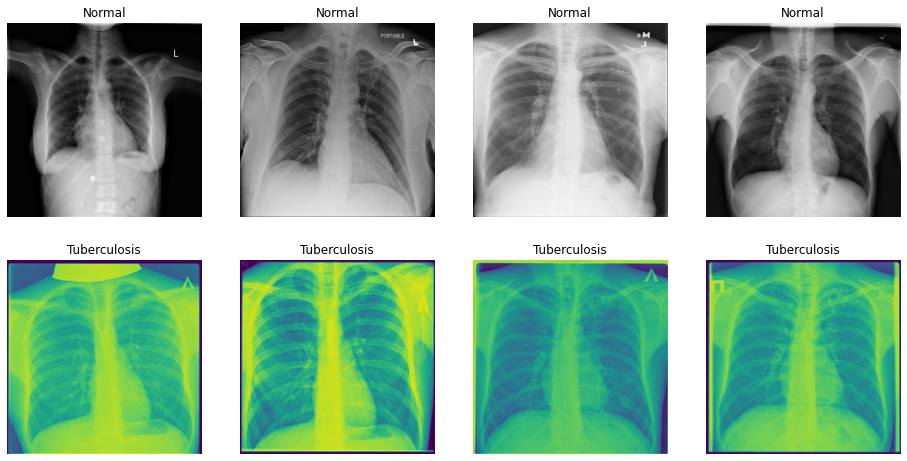

In [12]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 
#pip install matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [13]:
!pip3 install keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import random

In [14]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database_splitted/test"

In [15]:
height = 100
width = 100
batch_size = 32

# Preprocessing Khusus Noise

In [16]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    #np.clip(img, 0., 255.)
    return img

In [17]:
#Testing Generator Both
generator_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    preprocessing_function=add_noise)

val_gen = ImageDataGenerator(rescale = 1./255)


train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


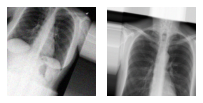

In [18]:
#tampilkan Data Generator Khusus add_noise
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
for i in range(2):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

# Modelling

In [19]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [25]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D,AveragePooling2D,GlobalAveragePooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [26]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()
model.add(InputLayer(input_shape=[100,100,3]))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))


model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())


model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='elu'))
model.add(BatchNormalization()),
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 50, 50, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 average_pooling2d_5 (Averag  (None, 25, 25, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 256)       295168    
                                                                 
 average_pooling2d_6 (Averag  (None, 13, 13, 256)     

In [27]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics='acc')

C:\Users\ASUS RYZEN\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
from tensorflow.keras import callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')> 0.90):
            print("\nAkurasi validasi telah mencapai >90%!")
            self.model.stop_training = True

callbacks = myCallback()

In [29]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
#callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')        
directory_to_save_best_model_file = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/UjiCoba.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
'''callbacks = [callbacks, best_model]'''

In [30]:
H = model.fit(train_generator, epochs=150, steps_per_epoch=10, validation_data = validation_generator, callbacks = [callbacks, best_model])

Epoch 1/150
10/10 [==============================] - 99s 10s/step - loss: 0.8416 - acc: 0.7375 - val_loss: 1.3019 - val_acc: 0.1667
Epoch 2/150
10/10 [==============================] - 99s 10s/step - loss: 0.5935 - acc: 0.7750 - val_loss: 0.3129 - val_acc: 0.9000
Epoch 3/150
10/10 [==============================] - 97s 10s/step - loss: 0.3880 - acc: 0.8750 - val_loss: 1.8635 - val_acc: 0.8452
Epoch 4/150
10/10 [==============================] - 97s 10s/step - loss: 0.4541 - acc: 0.8625 - val_loss: 2.0618 - val_acc: 0.8524
Epoch 5/150
10/10 [==============================] - 96s 10s/step - loss: 0.4364 - acc: 0.8625 - val_loss: 2.2355 - val_acc: 0.8357
Epoch 6/150
10/10 [==============================] - ETA: 0s - loss: 0.5052 - acc: 0.8344
Akurasi validasi telah mencapai >90%!
10/10 [==============================] - 97s 10s/step - loss: 0.5052 - acc: 0.8344 - val_loss: 0.7601 - val_acc: 0.9024


In [31]:
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/UjiCoba.h5')

# Plotting

In [34]:
!pip3 install -U scikit-learn

In [36]:
!pip3 install seaborn

In [37]:
!pip3 install numpy
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

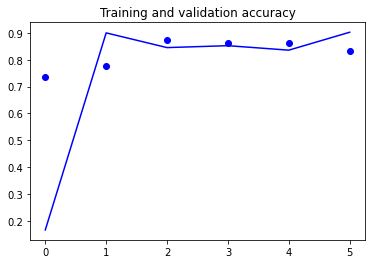

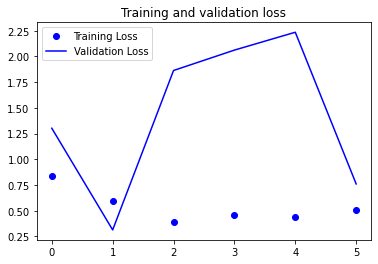

In [39]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


In [41]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUSRY~1\AppData\Local\Temp/ipykernel_14676/1934385515.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Classification Report
              precision    recall  f1-score   support

      Normal       0.90      1.00      0.95       350
Tuberculosis       1.00      0.47      0.64        70

    accuracy                           0.91       420
   macro avg       0.95      0.74      0.80       420
weighted avg       0.92      0.91      0.90       420



In [42]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        shuffle=False,
        class_mode='categorical')

Found 420 images belonging to 2 classes.


In [43]:
import json
from tensorflow.keras.models import load_model
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/ML_Praktikum/Modul5/'
model_saved = load_model(target_dir +'UjiCoba.h5')

In [44]:
test_score = model_saved.evaluate_generator(test_generator, test_generator.batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

C:\Users\ASUSRY~1\AppData\Local\Temp/ipykernel_14676/2575999414.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model_saved.evaluate_generator(test_generator, test_generator.batch_size)


[INFO] accuracy: 91.43%
[INFO] Loss:  0.7336308360099792


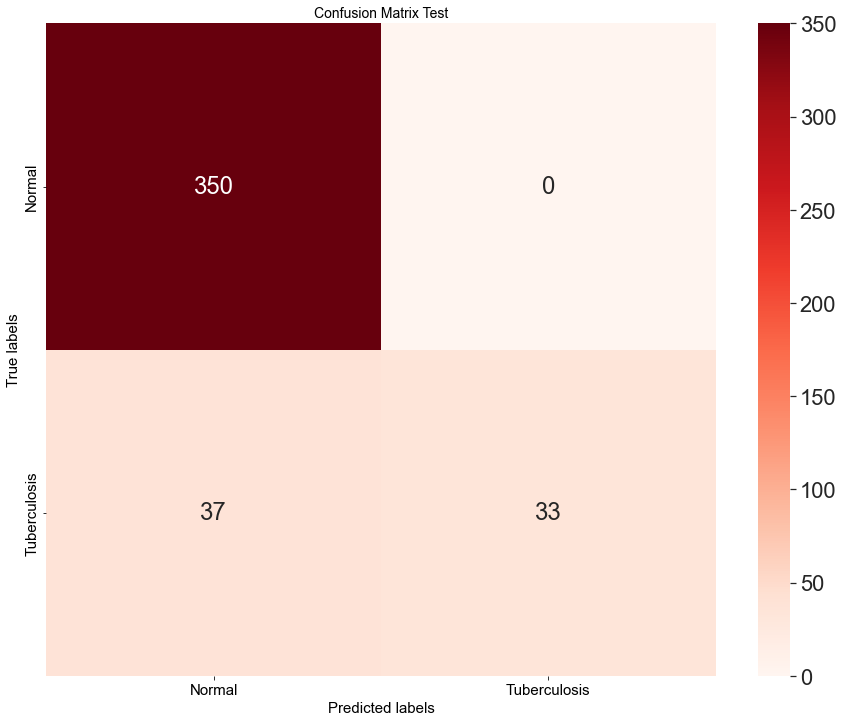

In [45]:
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()